In [3]:
#导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']#用来正常显示中文
from datetime import datetime

# 1、初识数据


In [11]:
df = pd.read_csv('C:\\Users\\Administrator\\Desktop\\kelu.csv')
df.info()
#需要将time转为datetime
#基本信息：
#1、门票价格101
#2、数据来自16-19年
#3、8k+的数据量

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     8757 non-null   object
 1   rating     8757 non-null   int64 
 2   time       8757 non-null   object
 3   year       8757 non-null   int64 
 4   amount     8757 non-null   int64 
 5   frequency  8757 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 410.6+ KB


In [13]:
df.describe()
#根据平均分92，和1/2分位得知，大多数用户评分在100，效果非常不错
#16年-19年门票价格都是110
#

,rating,year,amount,frequency
count,8757.000000,8757.000000,8757.0,8757.0
mean,92.417495,2017.760420,110.0,1.0
std,14.231179,0.686734,0.0,0.0
min,20.000000,2016.000000,110.0,1.0
25%,80.000000,2017.000000,110.0,1.0
50%,100.000000,2018.000000,110.0,1.0
75%,100.000000,2018.000000,110.0,1.0
max,100.000000,2019.000000,110.0,1.0


# 2、分析数据

## 1、每天销量分析

In [20]:
df['time'] = pd.to_datetime(df['time'],format='%Y/%m/%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   author     8757 non-null   object        
 1   rating     8757 non-null   int64         
 2   time       8757 non-null   datetime64[ns]
 3   year       8757 non-null   int64         
 4   amount     8757 non-null   int64         
 5   frequency  8757 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 410.6+ KB


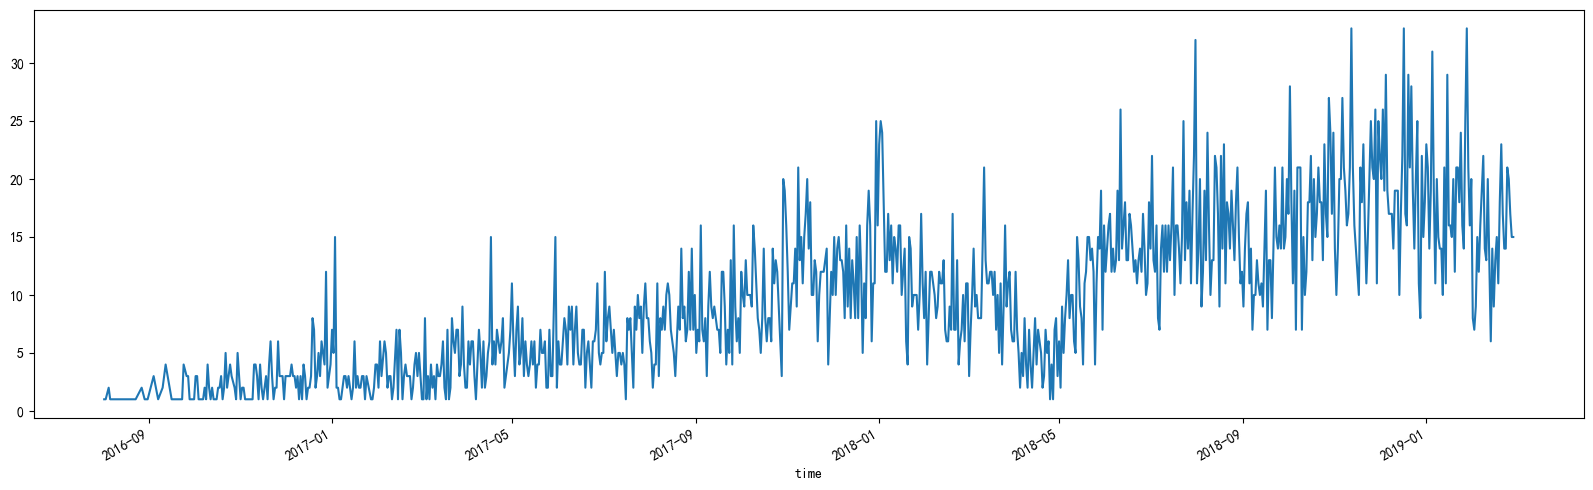

In [32]:
day = df.groupby('time')['frequency'].count()

plt.figure(figsize=(20,6))
day.plot()
plt.show()

#整体观察：每日销量呈现上升趋势，但是2018年01-05月大幅下降，根据网络查找，估计原因：两岸关系紧张导致陆客骤降：自2016年民进党上台后，两岸官方交流中断
#台风、疫情、运营不利
#16年9月-17年1月，销量非常低，每天2-3张门票，猜测:101观景台门票干刚上线发售，光景台刚对游客开放


## 2、每月销量分析

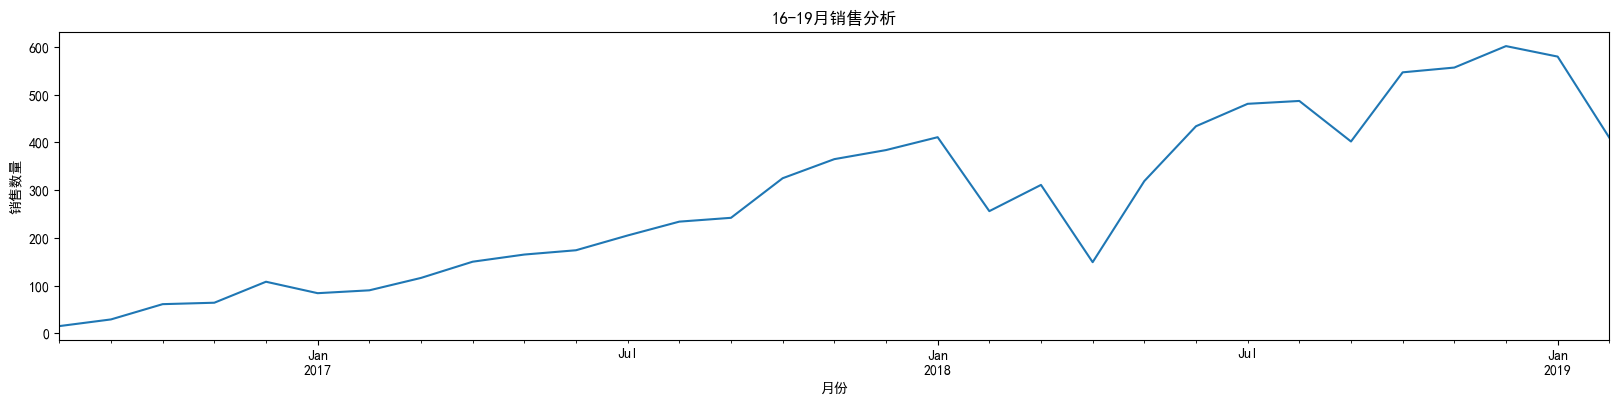

In [42]:
df['month'] = df['time'].dt.to_period('M')#保留月份精度的日期
df.groupby('month')['frequency'].count().plot(figsize=(20,4))#按照月份进度的计数
plt.xlabel('月份')
plt.ylabel('销售数量')
plt.title('16-19月销售分析')
plt.show()
#月份整体销量呈现上升趋势，但是在18年2，3，4月销量下滑明显，跟每天销量下滑有关。猜测：台风、疫情、运营推广不力

## 3、每个用户的购买量和消费金额分析

In [59]:
#按照游客分组，统计每个游客的购买次数
grouped_count_author = df.groupby('author')['frequency'].count().reset_index()
#按照游客分组，统计每个游客的消费金额
grouped_sum_amount = df.groupby('author')['amount'].sum().reset_index()

user_purchase_retention = pd.merge(left = grouped_count_author,
                                   right = grouped_sum_amount,
                                   on = 'author',
                                   how = 'inner')
user_purchase_retention


##agg写法
# user_purchase_retention = (
#     df.groupby('author')  # 按作者分组
#     .agg(
#         purchase_count=('frequency', 'count'),  # 统计购买次数
#         total_amount=('amount', 'sum')           # 计算总金额
#     )
#     .reset_index()  # 将作者索引转为列
# )

,author,frequency,amount
0,wenbiao,1,110
1,Goh Yu Wen Eunice,1,110
2,Hui Shan,1,110
3,Huihui,1,110
4,KO-CHENG,1,110
...,...,...,...
7717,芊羽,1,110
7718,華山,1,110
7719,蘇,1,110
7720,郁君,1,110


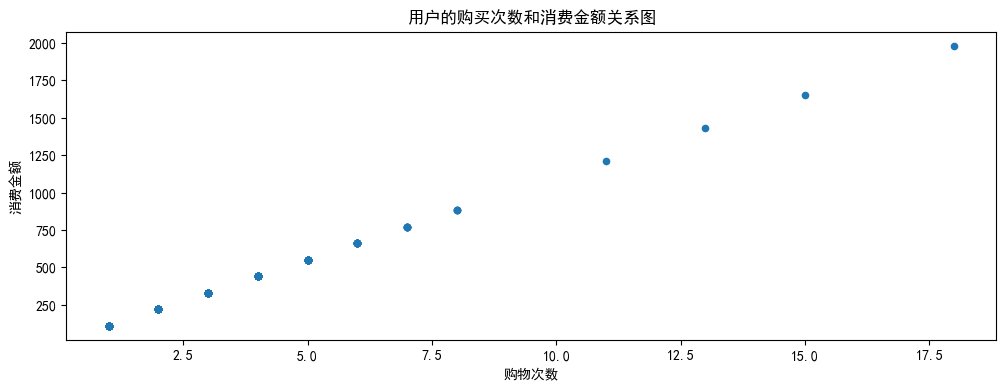

In [77]:
user_purchase_retention.plot.scatter(x='frequency',y='amount',figsize=(12,4))
plt.title('用户的购买次数和消费金额关系图')
plt.xlabel('购物次数')
plt.ylabel('消费金额')
plt.show()
#结论：斜率就是票价110，用户的消费金额和消费次数呈现线性关系

## 用户购买门票数量分析

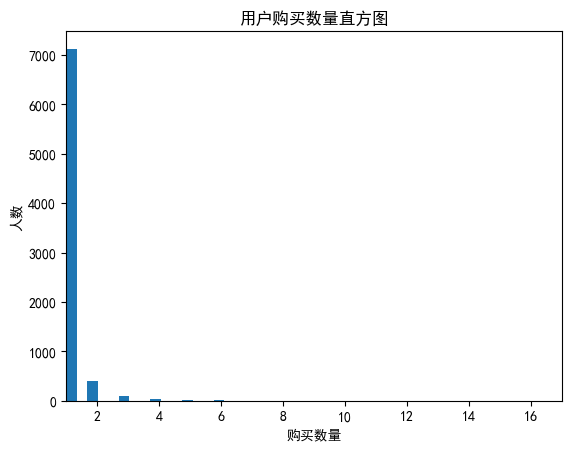

In [84]:
df.groupby('author')['frequency'].count().plot.hist(bins=50)#bins--柱子宽度=（最大值-最小值）/bins
plt.xlim(1,17)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('用户购买数量直方图')
plt.show()
#绝大多数游客购买过1张门票，用户在7000左右
#少数人购买过2-4张门票，猜测：可能是台北周边用户

## 用户购买门票两次及以上情况分析

In [87]:
df_frequency_2 = df.groupby('author').count().reset_index()
df_frequency_2 

,author,rating,time,year,amount,frequency,month
0,wenbiao,1,1,1,1,1,1
1,Goh Yu Wen Eunice,1,1,1,1,1,1
2,Hui Shan,1,1,1,1,1,1
3,Huihui,1,1,1,1,1,1
4,KO-CHENG,1,1,1,1,1,1
...,...,...,...,...,...,...,...
7717,芊羽,1,1,1,1,1,1
7718,華山,1,1,1,1,1,1
7719,蘇,1,1,1,1,1,1
7720,郁君,1,1,1,1,1,1


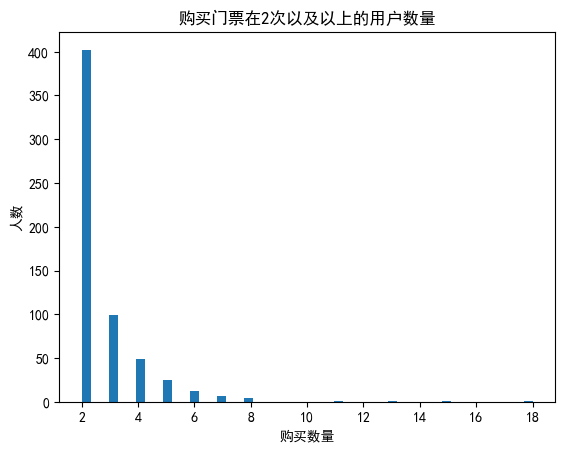

In [91]:
df_frequency_2[df_frequency_2['frequency']>=2].groupby('author')['frequency'].sum().plot.hist(bins=50)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('购买门票在2次以及以上的用户数量')
plt.show()
#消费两次的用户整体上占比比较大，大于2次的用户占比小部分，购买次数最多为18次

## 购买两次及以上的具体人数

In [96]:
df_frequency_2[df_frequency_2['frequency']>=2].groupby('frequency')['author'].count()
#除去购买一次的顾客，可以看出购买2次有402人，----大多数够买2-5次

frequency
2     402
3      99
4      49
5      25
6      13
7       7
8       4
11      1
13      1
15      1
18      1
Name: author, dtype: int64

## 购买次数在1-5次之间的用户占比情况


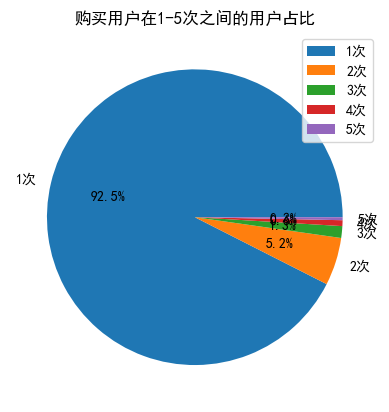

In [123]:
#对用户author进行分组 取出消费频率 进行逻辑判断（1-5） 数据可视化（pie）
df_frequenc_gte_1 = df.groupby('author')['frequency'].count().reset_index()
#过滤第一次 购买次数 >= 1
df_frequenc_gte_1 =df_frequenc_gte_1[df_frequenc_gte_1['frequency']>=1]
#过滤第二次 购买次数<=5次
df_frequenc_gte_1 =df_frequenc_gte_1[df_frequenc_gte_1['frequency']<=5]
#绘制饼图
values = df_frequenc_gte_1
values = values.groupby('frequency')['frequency'].count()
labels = ['1次','2次','3次','4次','5次']
##饼图要的是list类型
values = list(values)
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('购买用户在1-5次之间的用户占比')
plt.legend()
plt.show()

## 购买次数在2-5次之间的用户占比情

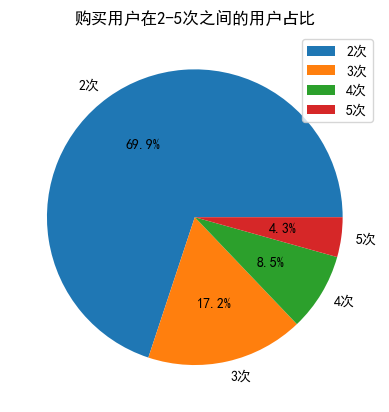

In [130]:
#对用户author进行分组 取出消费频率 进行逻辑判断（1-5） 数据可视化（pie）
df_frequenc_gte_1 = df.groupby('author')['frequency'].count().reset_index()
#过滤第一次 购买次数 >= 1
df_frequenc_gte_1 =df_frequenc_gte_1[df_frequenc_gte_1['frequency']>=2]
#过滤第二次 购买次数<=5次
df_frequenc_gte_1 =df_frequenc_gte_1[df_frequenc_gte_1['frequency']<=5]
#绘制饼图
values = df_frequenc_gte_1
values = values.groupby('frequency')['frequency'].count()
labels = ['2次','3次','4次','5次']
##饼图要的是list类型
values = list(values)
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('购买用户在2-5次之间的用户占比')
plt.legend()
plt.show()
#在购物次数2-5次中，其中消费2次的占比70%，消费3次17%，4次占比8.5%，5次占比4.3%
#消费次数2、3次用户依然重要

#4、5次比较少，需要针对2、3次用户进行引导
#消费次数在1次的用户，可以尝试转化消费2，3次

## 用户复购率分析


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5040\168162613.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_count = pivot_count.applymap(lambda x:1 if x>1 else np.NAN if x==0 else 0)


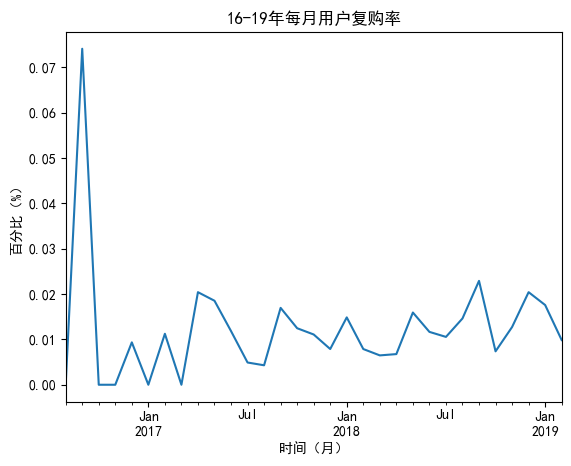

In [185]:
#复购率：在某一窗口内（多指一个月内）消费次数在两次及以上的用户在总消费的占比
pivot_count = df.pivot_table(index = 'author',
                            columns = 'month',
                             values = 'frequency',
                             aggfunc = 'count'
                            ).fillna(0)
pivot_count 
#三种情况：
#消费次数>1,复购用户
#消费次数=1，非复购用户，0
#消费次数=0，未消费用户，na
#applymap:df,处理每个元素
#apply:df，处理一行或一列，
#map:Serise，处理每一个元素
pivot_count = pivot_count.applymap(lambda x:1 if x>1 else np.NAN if x==0 else 0)
(pivot_count.sum()/pivot_count.count()).plot()
plt.xlabel('时间（月）')
plt.ylabel('百分比（%）')
plt.title('16-19年每月用户复购率')
plt.show()
#16年9月份复购率最高到达7.5%，然后开始下降，趋于平稳在1.2%

## 复购用户人数

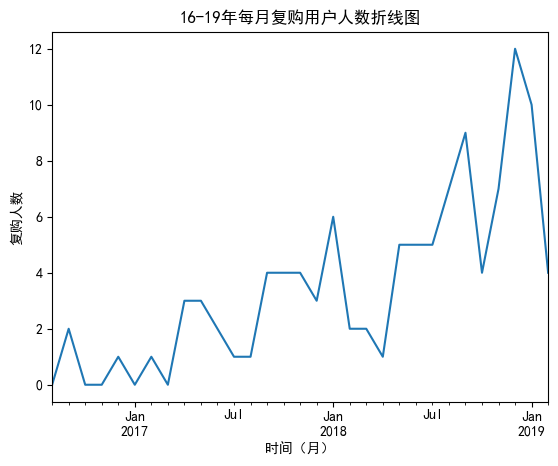

In [188]:
pivot_count.sum().plot()
plt.xlabel('时间（月）')
plt.ylabel('复购人数')
plt.title('16-19年每月复购用户人数折线图')
plt.show()
#整体来看，复购人数长线上升趋势
#但是在18年2，3，4，10月和19年2月份，复购人数下降较为明显，出现异常信号，需要和业务部门具体分析情况

## 回购率分析

In [195]:
#回购率：在某一个是时间窗口内消费过的用户，在下一个时间窗口仍旧消费的占比
#举个例子：当前月消费用户的人数1000人，其中200人在下一个月仍旧进行了消费，回购率200/1000 = 20%
pivot_purchase = df.pivot_table(
    index = 'author',
    columns = 'month',
    values = 'frequency',
    aggfunc = 'count'
).fillna(0)
pivot_purchase.head()

month,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Goh Yu Wen Eunice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hui Shan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Huihui,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO-CHENG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5040\2884250521.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i] == 1:
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5040\2884250521.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i+1] == 1:#下一个月消费，是回购用户，1


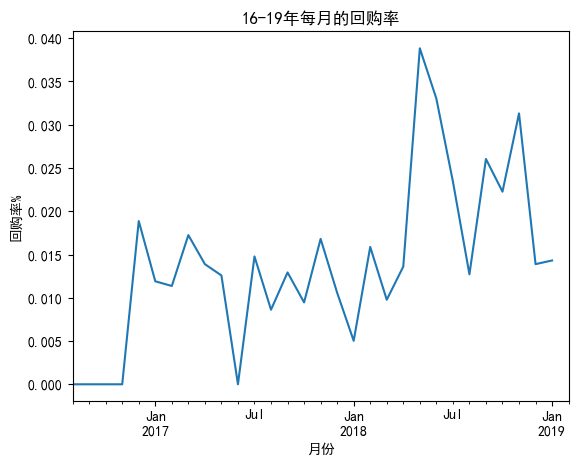

In [197]:
def purchase_return(data):#data:代表的是每一名游客的所有月份消费记录
    status = []#存储每一个月回购状态  
    #本月消费
    for i in range(30):
        if data[i] == 1:
             if data[i+1] == 1:#下一个月消费，是回购用户，1
                 status.append(1)
             else:#na|未消费
                 status.append(0)#非回购用户，0
        else:##本月未消费
            status.append(np.NAN)
    status.append(np.NAN)
    return pd.Series(status,pivot_purchase.columns)
    
pivot_purchase_return = pivot_purchase.apply(purchase_return,axis=1)#用户回购状态
(pivot_purchase_return.sum()/pivot_purchase_return.count()).plot()
plt.xlabel('月份')
plt.ylabel('回购率%')
plt.title('16-19年每月的回购率')
plt.show()

#回购率最高在18年的6月份，达到4%
#整体来看，回购率呈现微弱的上升趋势
#出现较大的下滑，分别是17年的6

## 回购人数分析

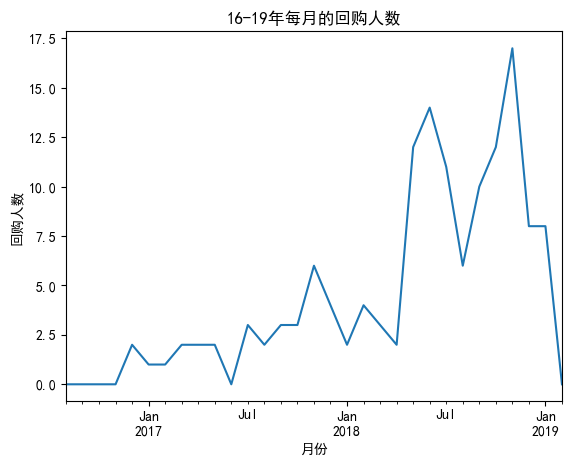

month
2016-08     0.0
2016-09     0.0
2016-10     0.0
2016-11     0.0
2016-12     2.0
2017-01     1.0
2017-02     1.0
2017-03     2.0
2017-04     2.0
2017-05     2.0
2017-06     0.0
2017-07     3.0
2017-08     2.0
2017-09     3.0
2017-10     3.0
2017-11     6.0
2017-12     4.0
2018-01     2.0
2018-02     4.0
2018-03     3.0
2018-04     2.0
2018-05    12.0
2018-06    14.0
2018-07    11.0
2018-08     6.0
2018-09    10.0
2018-10    12.0
2018-11    17.0
2018-12     8.0
2019-01     8.0
2019-02     0.0
Freq: M, dtype: float64

In [203]:
pivot_purchase_return.sum().plot()
plt.xlabel('月份')
plt.ylabel('回购人数')
plt.title('16-19年每月的回购人数')
plt.show()
pivot_purchase_return.sum()
#回购人数整呈现上升趋势，回购人数最多时在18年11月份，人数17人
#其中几次回购人数下降较为明显

## 每个用户分层占比情况


In [215]:
## 活跃用户|不活跃|回流用户|新用户

#判断是否是新用户、活跃用户、不活跃用户、回流用户
def active_status(data):#data:整行数据，共18列
    status = []#负责存储18个月：unreg|new|active|unactive|return
    for i in range(31):
        #本月有消费
        if data[i] == 0:
                if len(status) ==0:# 前面没有任何记录（97年1月份）
                    status.append('unreg')
                else:#开始判断上一个状态、
                    if status[i-1] == 'unreg':#一直未消费过
                        status.append('unreg')
                    else:#unreg|new|active|unactive|return
                        status.append('unactive')#不管上个月是否消费过，本月都不是活跃用户  
                pass
        #本月没有消费 == 1
        else:
            if len(status) == 0:#前面没有任何记录（97年1月份）
                status.append('new')#第一次消费
            else:#之前的月份有记录（判断上一个月的状态）
                if status[i-1] == 'unactive':
                    status.append('return')#前几个月不活跃吗，现在又回来消费了，回流用户
                elif status[i-1] == 'unrge':
                    status.append('new')#第一次消费
                else:#new|active|return =1
                    status.append('active')#活跃用户
    return pd.Series(status,pivot_purchase.columns)#值status,列名df_purchase中的列名
    
pivot_purchase_states = pivot_purchase.apply(active_status,axis=1)#得到用户分层结果
pivot_purchase_states.head()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5040\110323832.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i] == 0:


month,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,active,unactive,unactive
Goh Yu Wen Eunice,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Hui Shan,unreg,unreg,unreg,unreg,active,unactive,unactive,unactive,unactive,unactive,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Huihui,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
KO-CHENG,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unreg,unreg,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [228]:
pivot_status_count = pivot_purchase_states.replace('unreg',np.NAN).apply(pd.value_counts)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5040\444920342.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pivot_status_count = pivot_purchase_states.replace('unreg',np.NAN).apply(pd.value_counts)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5040\444920342.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pivot_status_count = pivot_purchase_states.replace('unreg',np.NAN).apply(pd.value_counts)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5040\444920342.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pivot_status_count = pivot_purchase_states.replace('unreg',np.NAN).apply(pd.value_counts)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5040\444920342.py:1: FutureWarning: pandas.value_count

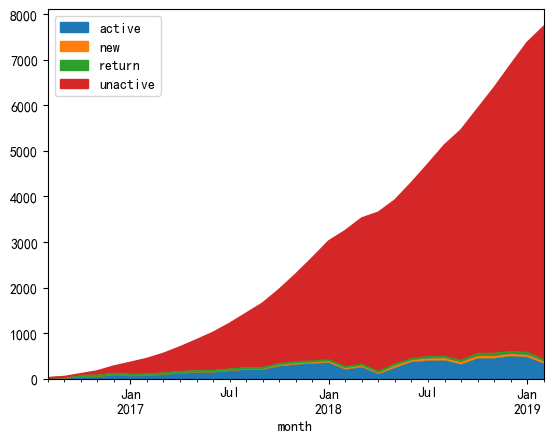

In [230]:
pivot_status_count.T.plot.area()
plt.show()
#可以看出，红色（不活跃用户）占据网站用户的主题
#橙色（新用户）从17年1月-19年1月，呈上升趋势；但在18年4月份左右，新用户的量突然急剧下降，异常信号；以后新用户逐渐上升
#绿色（回流用户），一直稳定维持状态，但是在18年2-4月份，出现异常下降情况，一场信号；

## 每月不同用户占比

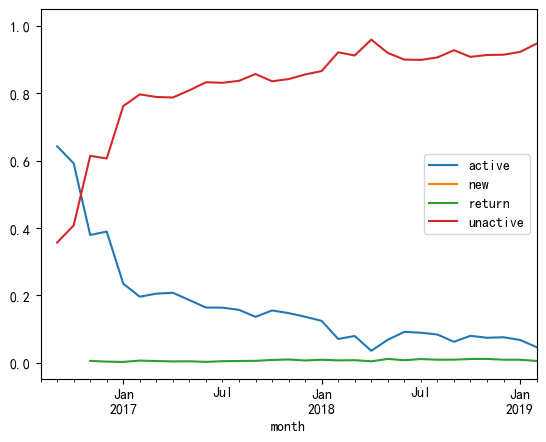

In [236]:
return_rate = pivot_status_count.apply(lambda x:x/x.sum())##默认按列操作
return_rate.T.plot()
plt.show()
#在17年1月份过后，网站用户主体由不活跃用户组成，新用户占比开始逐渐下降，并且趋于稳定，稳定在10%左右
#活跃用户和会用户，一直很稳定，并且占比比较小
#16年9月前后，新用户和不活跃用户，发生较大的变化，猜测：活动或节假日造成的

## 每月活跃用户的占比

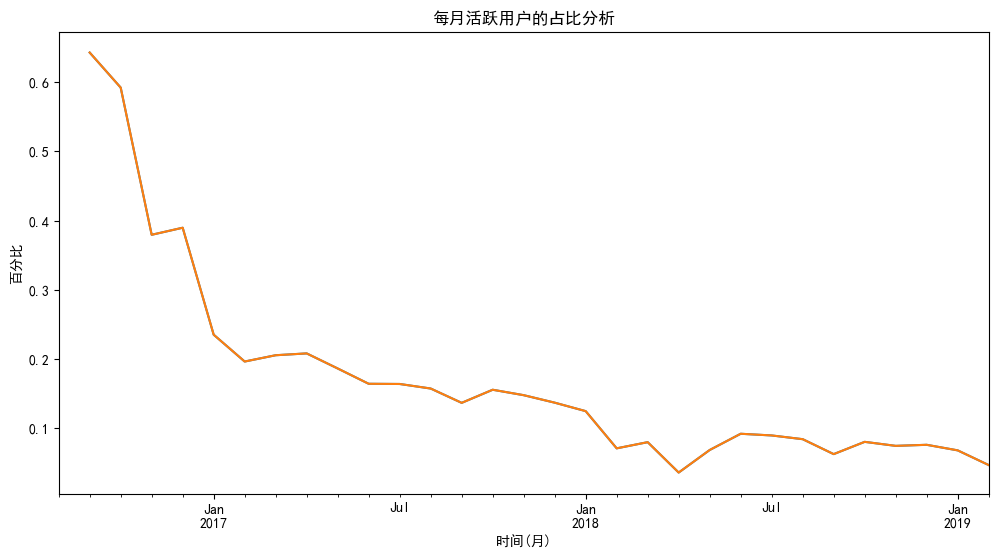

In [253]:
return_rate.T['active'].plot(figsize=(12,6))
plt.xlabel('时间(月)')
plt.ylabel('百分比')
plt.title('每月活跃用户的占比分析')
plt.show()
#在17年1月活跃的用户占比比较高，在0.5%，但是在1-2月份急剧下降，猜测：春节的影响，或者温度
#结合历年1-2月份销量来看，都会出现一定的比例下降，再次验证我们的猜测：春节影响
#在18年2月和5月出现异常，门票销量下降，猜测：雨水或台风影响

## 每月回流用户占比

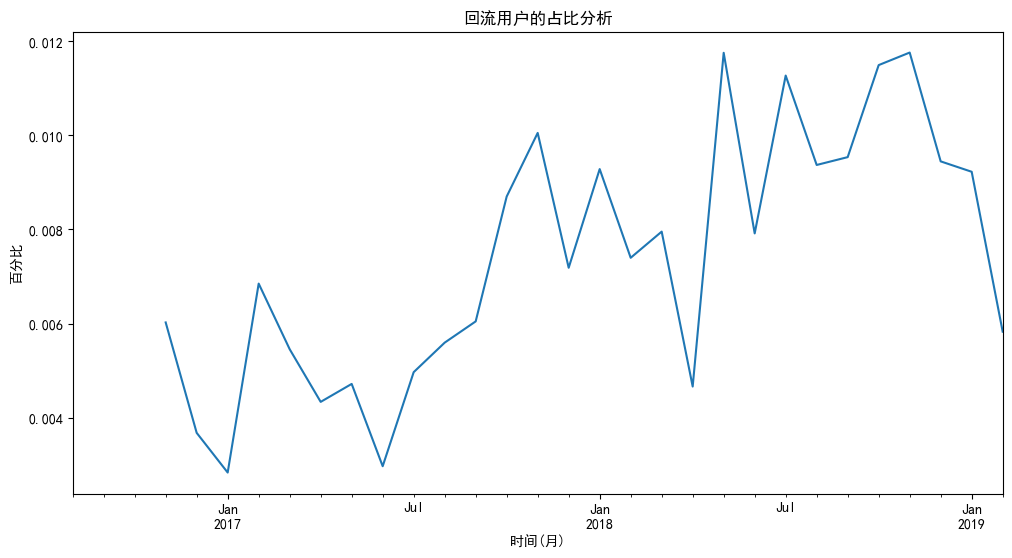

In [261]:
return_rate.T['return'].plot(figsize=(12,6))
plt.xlabel('时间(月)')
plt.ylabel('百分比')
plt.title('回流用户的占比分析')
plt.show()
#整体来看，回流用户比例上升趋势，但是波动较大
#在17年1月和6月，18年4月，19年2月，回流用户比例都出现了较大幅度下降，表现为异常信号
#无论是回流用户还是活跃用户，在以上几个月份都表现为下降趋势


In [265]:
#方法一：return_rate.T['return'].mean()
np.mean(return_rate.T['return'])#方法二效率更高
#回流用户的平均值在0.73%左右
#在17年9月份以后，仅有异常点在平均点以下
#在17年9月份以前，所有数据都显示出回流用户比例低于平均值，猜测：景点开放不就，很多游客尚未发现景点

0.00736823576229978

## 用户的生命周期

In [302]:
#计算方式：每一个用户最后一个购买商品的时间--用户第一次购买商品的时间，转换成天数，即为生命周期
time_min = df.groupby('author')['time'].min()
time_max = df.groupby('author')['time'].max()
life_time =(time_max-time_min).reset_index()
life_time.describe()
#通过count=7722得知，存在一个用户多次消费的情况
#平均生命周期天数23天，通过25%，50%，75%的分位数得知，绝大多数生命周期为0天
#最大生命周期为864天

,time
count,7722
mean,23 days 01:45:32.867132867
std,98 days 16:47:46.849668504
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,0 days 00:00:00
max,864 days 00:00:00


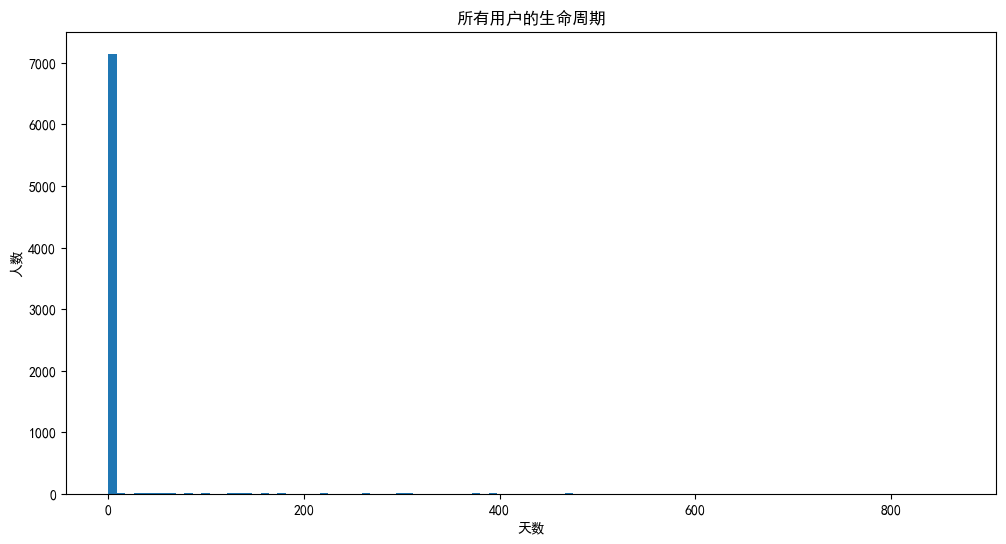

In [304]:
## 用户生命周期直方图
#转成天数
life_time['time'] = life_time['time'].dt.days
life_time['time'].plot.hist(bins=100,figsize=(12,6))
plt.xlabel('天数')
plt.ylabel('人数')
plt.title('所有用户的生命周期')
plt.show()

In [306]:
print(life_time[life_time['time']==0])

#生命周期为0，存在7120个用户
#剩下的592个用户属于优质用户

                  author  time
0                wenbiao     0
1      Goh Yu Wen Eunice     0
2               Hui Shan     0
3                 Huihui     0
4               KO-CHENG     0
...                  ...   ...
7717                  芊羽     0
7718                  華山     0
7719                   蘇     0
7720                  郁君     0
7721                  青慧     0

[7130 rows x 2 columns]


## 生命周期大于0天的用户，直方图

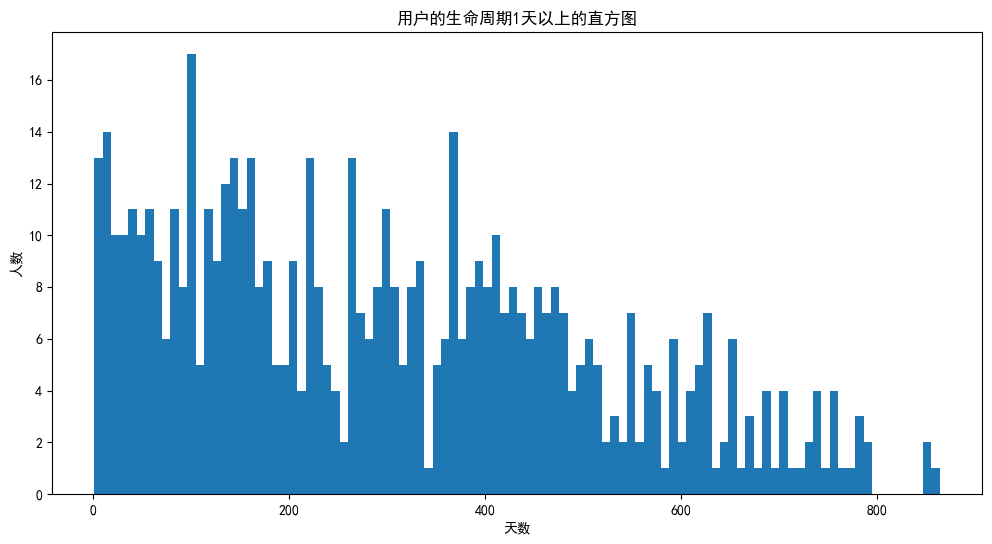

300.9662162162162

In [330]:
life_time[life_time['time']>0]['time'].plot.hist(bins = 100,figsize=(12,6))
plt.xlabel('天数')
plt.ylabel('人数')
plt.title('用户的生命周期1天以上的直方图')
plt.show()
mean = np.mean(life_time[life_time['time']>0]['time'])
mean
#用户平均生命周期300天，生命周期在100天的用户量达到了最大值17人
#从100-350天来看，用户量呈现缓慢下降的趋势
#350-800天左右，用户量下降速度明显，存在一定用户流失，而忠诚用户量较少

## 各时间段的用户留存率


In [338]:
#pd.cut()函数

np.random.seed(42)
score_list = np.random.randint(25,100,size=3)
#score_list----array([76, 39, 96])
bins = [0,59,70,80,100]#指定多个区间
score_cut = pd.cut(score_list,bins)
score_cut
# pd.cut(
#     x, 
#     bins, 
#     right=True, 
#     labels=None, 
#     retbins=False, 
#     precision=3, 
#     include_lowest=False,
#     duplicates='raise'
# )
# 核心参数说明
# x: 要分箱的一维数组（Series）或可迭代对象
# bins: 定义分箱边界
# 整数：自动创建等宽区间（如 bins=5 创建5个等宽区间）
# 序列：自定义边界（如 bins=[0, 18, 35, 60, 100]）
# right: 是否包含右边界（默认 True，即区间为 (a, b]）
# labels: 为每个区间指定标签（长度需比 bins 少1）
# include_lowest: 是否包含第一个边界值（默认 False）

[(70, 80], (0, 59], (80, 100]]
Categories (4, interval[int64, right]): [(0, 59] < (59, 70] < (70, 80] < (80, 100]]

In [344]:
#留存率:1-90天--有多少留存用户。求出用户的留存天数，比如留存天数==89，属于1-90天内的留存天数
#留存天数计算方式：用户每一题的消费时间 分别减去 用户的第一次消费时间
#left,right,how,on,suffiex:相同列，不同后缀
user_purchase_retention = pd.merge(left=df,
                                   right=time_min.reset_index(),
                                   how='inner',on='author',
                                   suffixes=('','_min')
                                  )
#计算留存天数
user_purchase_retention['time_diff'] = user_purchase_retention['time']-user_purchase_retention['time_min']
user_purchase_retention['time_diff'] = user_purchase_retention['time_diff'].dt.days

In [371]:
#生成时间跨度（3个月，90天），判断属于哪个区间
bin = [i*90 for i in range(11)]#指定多个区间
user_purchase_retention['time_diff_bin'] = pd.cut(user_purchase_retention['time_diff'],bin)
user_purchase_retention

,author,rating,time,year,amount,frequency,month,time_min,time_diff,time_diff_bin
0,YOUNG,60,2019-02-28,2019,110,1,2019-02,2019-02-28,0,NaN
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02,2019-02-28,0,NaN
2,Sha,60,2019-02-28,2019,110,1,2019-02,2019-02-28,0,NaN
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02,2019-02-28,0,NaN
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02,2017-06-27,611,"(540.0, 630.0]"
...,...,...,...,...,...,...,...,...,...,...
8752,Jonathan,100,2016-08-06,2016,110,1,2016-08,2016-08-06,0,NaN
8753,Oliver Stephen Ah Kam,100,2016-08-05,2016,110,1,2016-08,2016-08-05,0,NaN
8754,Halley,100,2016-08-05,2016,110,1,2016-08,2016-08-05,0,NaN
8755,ANDREW WEIQIANG,100,2016-08-03,2016,110,1,2016-08,2016-08-03,0,NaN


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5040\3238690222.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_retention = user_purchase_retention.groupby(['author','time_diff_bin'])['frequency'].sum().unstack()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5040\3238690222.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_retention_trans = pivot_retention.fillna(0).applymap(lambda x:1 if x>0 else 0)


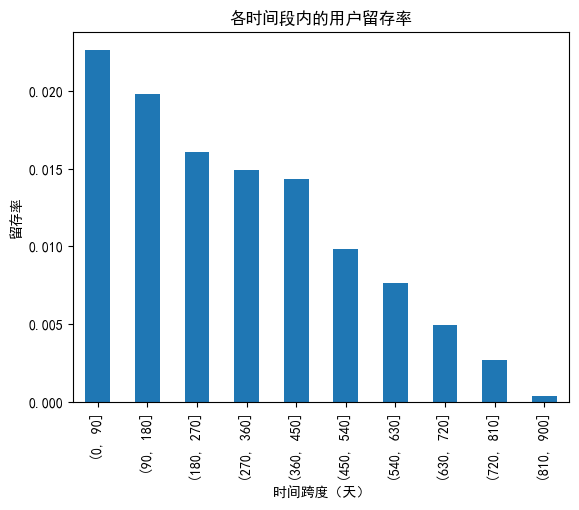

time_diff_bin
(0, 90]       0.022663
(90, 180]     0.019814
(180, 270]    0.016058
(270, 360]    0.014893
(360, 450]    0.014375
(450, 540]    0.009842
(540, 630]    0.007641
(630, 720]    0.004921
(720, 810]    0.002720
(810, 900]    0.000389
dtype: float64


In [397]:
#统计每个游客不，同的时间段内的消费频率和值(便于稍后判断该用户在某个时间段内是不是留存用户)
pivot_retention = user_purchase_retention.groupby(['author','time_diff_bin'])['frequency'].sum().unstack()
#判断用户是否留存用户(1:留存，0：留存)
pivot_retention_trans = pivot_retention.fillna(0).applymap(lambda x:1 if x>0 else 0)

#留存率
(pivot_retention_trans.sum()/pivot_retention_trans.count()).plot.bar()
plt.xlabel('时间跨度（天）')
plt.ylabel('留存率')
plt.title('各时间段内的用户留存率')
plt.show()
print(pivot_retention_trans.sum()/pivot_retention_trans.count())

#如图，每个周期是3个月，第一个周期留存率是2.2%，前三个周期的递减速度在0.3%左右
#在第四五个的时候趋于平稳，稳定留存率1.5%左右
#从第五个周期开始，留存率明显下降，下降到几乎0%，在第四五个周期的时候，需要采取方法将用户留住进行再次消费
#如果在跨度为1年的时候不召回用户，将导致大量流失

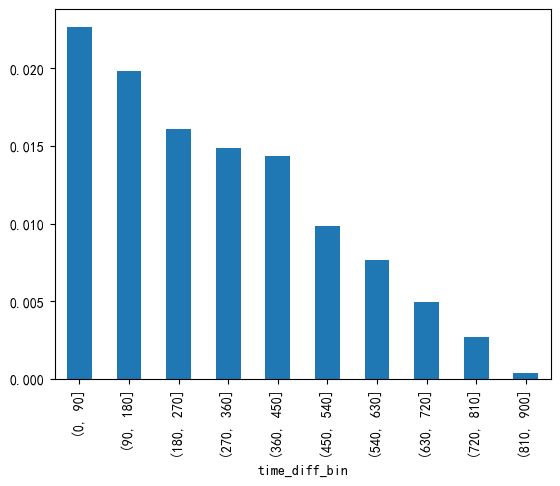

In [466]:
## 用户平均购买周期直方图
pivot_retention_trans.mean().plot.bar()
plt.show()

In [468]:
df

,author,rating,time,year,amount,frequency,month
0,YOUNG,60,2019-02-28,2019,110,1,2019-02
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02
2,Sha,60,2019-02-28,2019,110,1,2019-02
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02
...,...,...,...,...,...,...,...
8752,Jonathan,100,2016-08-06,2016,110,1,2016-08
8753,Oliver Stephen Ah Kam,100,2016-08-05,2016,110,1,2016-08
8754,Halley,100,2016-08-05,2016,110,1,2016-08
8755,ANDREW WEIQIANG,100,2016-08-03,2016,110,1,2016-08


month
2016-08     15
2016-09     29
2016-10     61
2016-11     64
2016-12    108
2017-01     84
2017-02     90
2017-03    116
2017-04    150
2017-05    165
2017-06    174
2017-07    205
2017-08    234
2017-09    242
2017-10    325
2017-11    365
2017-12    384
2018-01    411
2018-02    256
2018-03    311
2018-04    149
2018-05    319
2018-06    434
2018-07    481
2018-08    487
2018-09    402
2018-10    547
2018-11    557
2018-12    602
2019-01    580
2019-02    410
Freq: M, Name: author, dtype: int64


,author,rating,time,year,amount,frequency,month
0,YOUNG,60,2019-02-28,2019,110,1,2019-02
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02
2,Sha,60,2019-02-28,2019,110,1,2019-02
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02
...,...,...,...,...,...,...,...
8752,Jonathan,100,2016-08-06,2016,110,1,2016-08
8753,Oliver Stephen Ah Kam,100,2016-08-05,2016,110,1,2016-08
8754,Halley,100,2016-08-05,2016,110,1,2016-08
8755,ANDREW WEIQIANG,100,2016-08-03,2016,110,1,2016-08
